## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
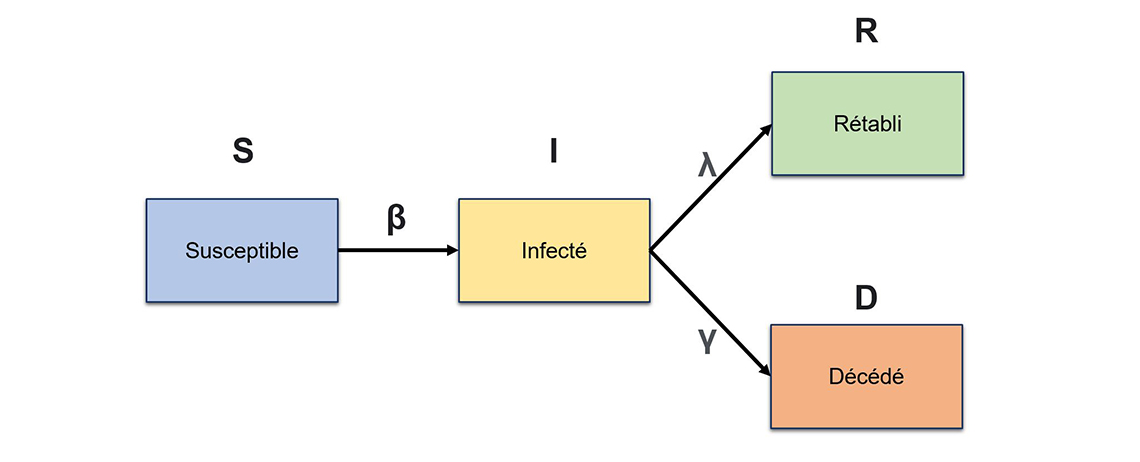


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [ ]:
#0 et 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import files
from scipy.interpolate import interp1d

# Méthode d'Euler pour résoudre le système SIRD
def euler_sird(β, γ, μ, S0, I0, R0, D0, dt, t_max):
    # Initialisation des variables
    t_values = np.arange(0, t_max, dt)
    S, I, R, D = S0, I0, R0, D0
    # Listes pour stocker les résultats
    S_list, I_list, R_list, D_list = [], [], [], []

    # Simulation via la méthode d'Euler
    for t in t_values:
        # Enregistrer les valeurs actuelles
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        D_list.append(D)

        # Calcul des dérivées
        dS = -β * S * I
        dI = β * S * I - γ * I - μ * I
        dR = γ * I
        dD = μ * I

        # Mise à jour des valeurs
        S += dS * dt
        I += dI * dt
        R += dR * dt
        D += dD * dt

    return t_values, np.array(S_list), np.array(I_list), np.array(R_list), np.array(D_list)

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

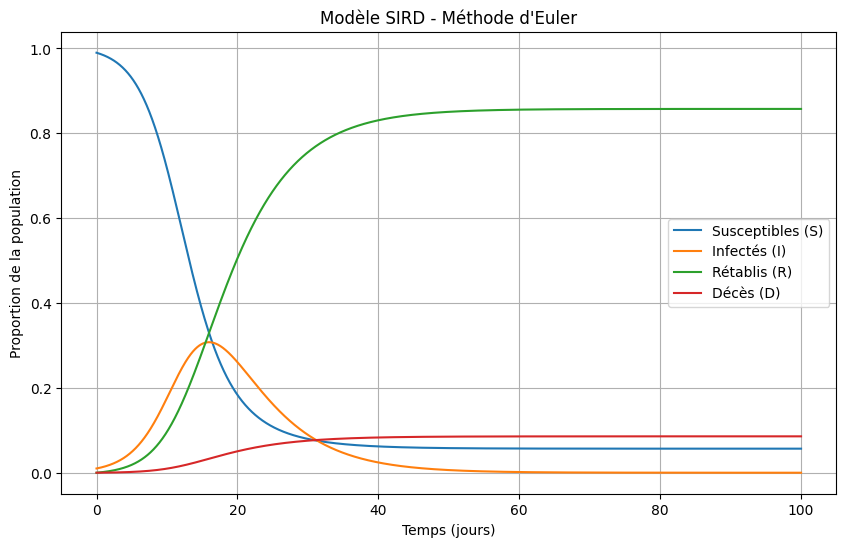

In [27]:
#1 Effectuons la simulation
# Paramètres initiaux
β, γ, μ = 0.5, 0.15, 0.015  # Paramètres du modèle
S0, I0, R0, D0 = 0.99, 0.01, 0.0, 0.0  # Conditions initiales
dt = 0.01  # Pas de temps
t_max = 100  # Durée de la simulation (en jours)

# Appliquer la méthode d'Euler
t_values, S, I, R, D = euler_sird(β, γ, μ, S0, I0, R0, D0, dt, t_max)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, label="Susceptibles (S)")
plt.plot(t_values, I, label="Infectés (I)")
plt.plot(t_values, R, label="Rétablis (R)")
plt.plot(t_values, D, label="Décès (D)")
plt.xlabel("Temps (jours)")
plt.ylabel("Proportion de la population")
plt.title("Modèle SIRD - Méthode d'Euler")
plt.legend()
plt.grid()
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [28]:
# Téléverser le fichier
uploaded = files.upload()

# Vérifier que le fichier a bien été téléversé
for filename in uploaded.keys():
    print(f"Fichier téléversé : {filename}")

# Charger les données empiriques
file_path = "sird_dataset.csv"  # Utiliser le nom du fichier directement
empirical_data = pd.read_csv(file_path)



Saving sird_dataset.csv to sird_dataset (3).csv
Fichier téléversé : sird_dataset (3).csv


In [33]:
# Affichons les premières lignes des données
print(empirical_data.head())


   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [49]:
#2 Implementons une fonction de cout

def cost_function(params, t_data, S_data, I_data, R_data, D_data, dt, t_max):
    β, γ, μ = params
    t_values, S_pred, I_pred, R_pred, D_pred = euler_sird(β, γ, μ, S_data[0], I_data[0], R_data[0], D_data[0], dt, t_max)

    # Interpolation des prédictions du modèle pour correspondre aux jours des données empiriques
    S_interp = interp1d(t_values, S_pred, kind='linear')(t_data)
    I_interp = interp1d(t_values, I_pred, kind='linear')(t_data)
    R_interp = interp1d(t_values, R_pred, kind='linear')(t_data)
    D_interp = interp1d(t_values, D_pred, kind='linear')(t_data)

    # Calcul du MSE entre les données observées et les prédictions interpolées
    mse = (mean_squared_error(S_data, S_interp) +
           mean_squared_error(I_data, I_interp) +
           mean_squared_error(R_data, R_interp) +
           mean_squared_error(D_data, D_interp))

    print(f"Paramètres : β = {β}, γ = {γ}, μ = {μ} | MSE = {mse}")  # Débogage
    return mse

In [50]:
#3 Utilisons une methode d'optimisation (Grid search)
# Paramètres pour la recherche par grille
beta_range = np.linspace(0.25, 0.5, 6)
gamma_range = np.linspace(0.08, 0.15, 6)
mu_range = np.linspace(0.005, 0.015, 6)

# Recherche de la combinaison optimale de paramètres
best_params = None
best_mse = float('inf')

for β in beta_range:
    for γ in gamma_range:
        for μ in mu_range:
            mse = cost_function([β, γ, μ], empirical_data['Jour'].values, empirical_data['Susceptibles'].values, empirical_data['Infectés'].values, empirical_data['Rétablis'].values, empirical_data['Décès'].values, dt, t_max)
            if mse < best_mse:
                best_mse = mse
                best_params = [β, γ, μ]

print(f"Meilleurs paramètres : β = {best_params[0]}, γ = {best_params[1]}, μ = {best_params[2]}")

# Simulation avec les meilleurs paramètres
t_values, S_values, I_values, R_values, D_values = euler_sird(best_params[0], best_params[1], best_params[2], S0, I0, R0, D0, dt, t_max)



Paramètres : β = 0.25, γ = 0.08, μ = 0.005 | MSE = 0.04821221754839553
Paramètres : β = 0.25, γ = 0.08, μ = 0.006999999999999999 | MSE = 0.05143496116161493
Paramètres : β = 0.25, γ = 0.08, μ = 0.009 | MSE = 0.05554144346506534
Paramètres : β = 0.25, γ = 0.08, μ = 0.011 | MSE = 0.06044350634215955
Paramètres : β = 0.25, γ = 0.08, μ = 0.012999999999999998 | MSE = 0.06606257262647124
Paramètres : β = 0.25, γ = 0.08, μ = 0.015 | MSE = 0.07232861267380994
Paramètres : β = 0.25, γ = 0.094, μ = 0.005 | MSE = 0.06708324764228266
Paramètres : β = 0.25, γ = 0.094, μ = 0.006999999999999999 | MSE = 0.07207977128924363
Paramètres : β = 0.25, γ = 0.094, μ = 0.009 | MSE = 0.07783717491835518
Paramètres : β = 0.25, γ = 0.094, μ = 0.011 | MSE = 0.08429187079520614
Paramètres : β = 0.25, γ = 0.094, μ = 0.012999999999999998 | MSE = 0.0913865664775639
Paramètres : β = 0.25, γ = 0.094, μ = 0.015 | MSE = 0.09906963847401856
Paramètres : β = 0.25, γ = 0.108, μ = 0.005 | MSE = 0.09855550648087755
Paramètres 

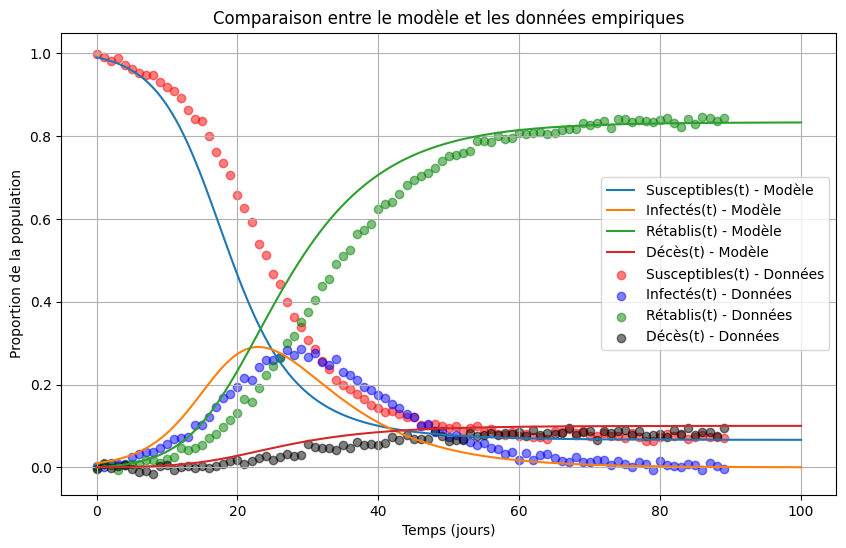

In [51]:
#4 Tracer les résultats du modèle et les données empiriques
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, label='Susceptibles(t) - Modèle')
plt.plot(t_values, I_values, label='Infectés(t) - Modèle')
plt.plot(t_values, R_values, label='Rétablis(t) - Modèle')
plt.plot(t_values, D_values, label='Décès(t) - Modèle')

# Tracer les données empiriques
plt.scatter(empirical_data['Jour'], empirical_data['Susceptibles'], label='Susceptibles(t) - Données', color='red', alpha=0.5)
plt.scatter(empirical_data['Jour'], empirical_data['Infectés'], label='Infectés(t) - Données', color='blue', alpha=0.5)
plt.scatter(empirical_data['Jour'], empirical_data['Rétablis'], label='Rétablis(t) - Données', color='green', alpha=0.5)
plt.scatter(empirical_data['Jour'], empirical_data['Décès'], label='Décès(t) - Données', color='black', alpha=0.5)

plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population')
plt.legend()
plt.title("Comparaison entre le modèle et les données empiriques")
plt.grid(True)
plt.show()


### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

Meilleurs paramètres : β = 0.35, γ = 0.108, μ = 0.012999999999999998
R0 = 2.892561983471074


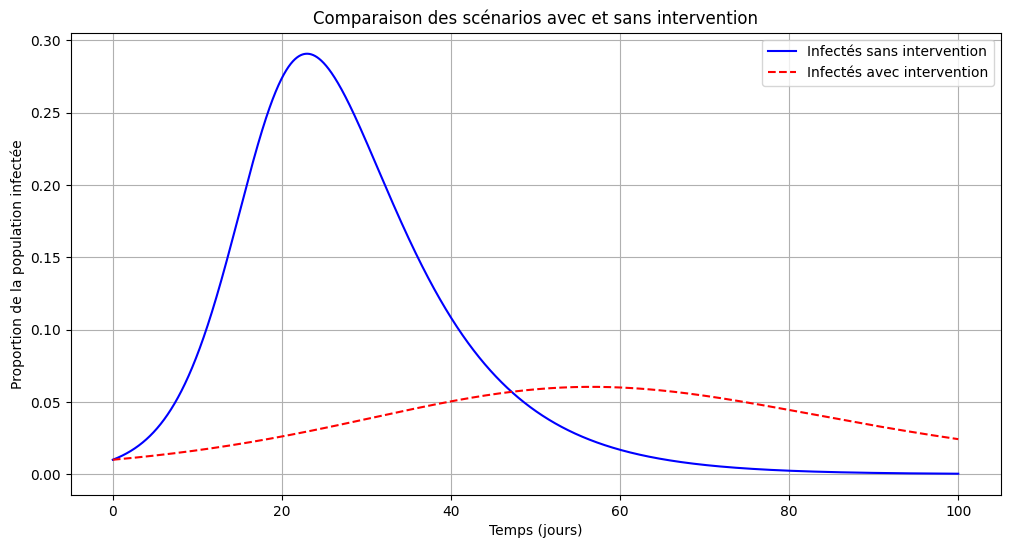

In [52]:
# Étape 4 : Scénarios de contrôle

# Étape 4 : Scénarios de contrôle

# Vérifier que best_params est défini
if best_params is None:
    raise ValueError("Aucun paramètre optimal n'a été trouvé. Vérifiez la recherche par grille et la fonction de coût.")
else:
    print(f"Meilleurs paramètres : β = {best_params[0]}, γ = {best_params[1]}, μ = {best_params[2]}")

# 1. Calcul de R0
R0 = best_params[0] / (best_params[1] + best_params[2])
print(f"R0 = {R0}")

# 2. Scénario sans intervention (utiliser les meilleurs paramètres trouvés)
t_values_no_intervention, S_no_int, I_no_int, R_no_int, D_no_int = euler_sird(
    best_params[0], best_params[1], best_params[2], S0, I0, R0, D0, dt, t_max
)

# 3. Scénario avec intervention (réduction de β)
β_intervention = best_params[0] * 0.5  # Réduction de 50% de β
t_values_intervention, S_int, I_int, R_int, D_int = euler_sird(
    β_intervention, best_params[1], best_params[2], S0, I0, R0, D0, dt, t_max
)

# 4. Tracer les deux scénarios
plt.figure(figsize=(12, 6))

# Scénario sans intervention
plt.plot(t_values_no_intervention, I_no_int, label='Infectés sans intervention', color='blue', linestyle='-')

# Scénario avec intervention
plt.plot(t_values_intervention, I_int, label='Infectés avec intervention', color='red', linestyle='--')

# Ajouter des labels et une légende
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion de la population infectée')
plt.title("Comparaison des scénarios avec et sans intervention")
plt.legend()
plt.grid(True)
plt.show()